In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
   

In [2]:
fnn=pd.read_csv('Company_Data.csv')
fnn

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
fn=fnn

In [4]:
fn['Sales']=fn['Sales'].apply(np.floor)

(array([  7.,  29.,  41., 107.,  52.,  85.,  52.,  16.,   9.,   2.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 Patch objects>)

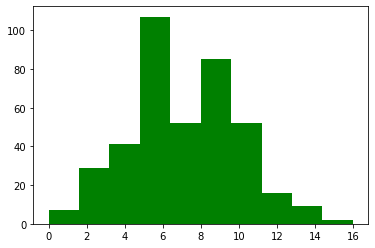

In [5]:
plt.hist(fn['Sales'],color=( 'green') )

In [8]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in fn.columns:
    if fn[column_name].dtype == object:
        fn[column_name] = le.fit_transform(fn[column_name])
    else:
        pass
fn  

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.0,138,73,11,276,120,0,42,17,1,1
1,11.0,111,48,16,260,83,1,65,10,1,1
2,10.0,113,35,10,269,80,2,59,12,1,1
3,7.0,117,100,4,466,97,2,55,14,1,1
4,4.0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.0,138,108,17,203,128,1,33,14,1,1
396,6.0,139,23,3,37,120,2,55,11,0,1
397,7.0,162,26,12,368,159,2,40,18,1,1
398,5.0,100,79,7,284,95,0,50,12,1,1


In [9]:
highsales=[] 
for i in range(0,len(fn)):
    if (fn.iloc[i,0])>8:
        highsales.append('Yes')
    else:
        highsales.append('No')

In [10]:
fn['highsales']=highsales
fn

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,highsales
0,9.0,138,73,11,276,120,0,42,17,1,1,Yes
1,11.0,111,48,16,260,83,1,65,10,1,1,Yes
2,10.0,113,35,10,269,80,2,59,12,1,1,Yes
3,7.0,117,100,4,466,97,2,55,14,1,1,No
4,4.0,141,64,3,340,128,0,38,13,1,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.0,138,108,17,203,128,1,33,14,1,1,Yes
396,6.0,139,23,3,37,120,2,55,11,0,1,No
397,7.0,162,26,12,368,159,2,40,18,1,1,No
398,5.0,100,79,7,284,95,0,50,12,1,1,No


In [11]:
 
X=(fn.iloc[:,1:10])
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
0,138,73,11,276,120,0,42,17,1
1,111,48,16,260,83,1,65,10,1
2,113,35,10,269,80,2,59,12,1
3,117,100,4,466,97,2,55,14,1
4,141,64,3,340,128,0,38,13,1
...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1
396,139,23,3,37,120,2,55,11,0
397,162,26,12,368,159,2,40,18,1
398,100,79,7,284,95,0,50,12,1


In [12]:
Y=fn.iloc[:,-1]
Y

0      Yes
1      Yes
2      Yes
3       No
4       No
      ... 
395    Yes
396     No
397     No
398     No
399    Yes
Name: highsales, Length: 400, dtype: object

In [13]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=40) 

###C5.0 entropy###

In [14]:
from sklearn.tree import  DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=10)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=10)

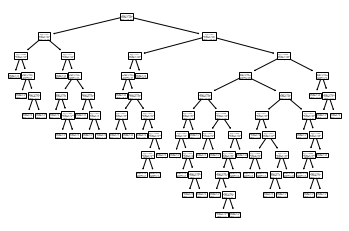

In [15]:
from sklearn import tree
tree.plot_tree(model);

In [16]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

No     58
Yes    22
dtype: int64

In [17]:
np.mean(preds==y_test)

0.825

###Building Decision Tree Classifier (CART) using Gini Criteria###

In [18]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=5) 

In [19]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=5)

In [20]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test) 

0.825

In [21]:
preddata=model.predict(X)
fnew=fn
fnew['preddata']=preddata
fnew


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,highsales,preddata
0,9.0,138,73,11,276,120,0,42,17,1,1,Yes,Yes
1,11.0,111,48,16,260,83,1,65,10,1,1,Yes,Yes
2,10.0,113,35,10,269,80,2,59,12,1,1,Yes,Yes
3,7.0,117,100,4,466,97,2,55,14,1,1,No,No
4,4.0,141,64,3,340,128,0,38,13,1,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.0,138,108,17,203,128,1,33,14,1,1,Yes,Yes
396,6.0,139,23,3,37,120,2,55,11,0,1,No,No
397,7.0,162,26,12,368,159,2,40,18,1,1,No,No
398,5.0,100,79,7,284,95,0,50,12,1,1,No,No


In [22]:
pd.crosstab(fnew['highsales'],fnew['preddata'])

preddata,No,Yes
highsales,,
No,279,7
Yes,8,106
